In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Algorithm-Independent Machine Learning

##  Introduction

In the previous chapters, we explored various learning algorithms and techniques for recognition. A recurring question is: **Which algorithm is the "best"?**

Some algorithms may be preferred for their:
- Lower computational complexity.
- Incorporation of prior knowledge about the data (e.g., discrete, continuous, strings).

However, for classification problems where these considerations are irrelevant or when comparing equivalent algorithms, we ask:

1. **Are there reasons to favor one algorithm over another?**
2. **Do simpler classifiers (Occam's Razor) generalize better?**

This chapter delves into the theoretical foundations of statistical pattern classification. It addresses the following:

- Lack of inherent superiority among classifiers.
- Bias-variance tradeoffs and cross-validation.
- Theoretical results, such as the No Free Lunch Theorem.

---

##  Lack of Inherent Superiority of Any Classifier

###  No Free Lunch Theorem

The **No Free Lunch (NFL) Theorem** states that, without prior assumptions about the classification task, **no classifier is inherently superior**. The apparent superiority of algorithms arises from specific problem contexts, data distributions, and assumptions. 

### Implications of NFL:
1. Focus on **prior information, data distribution, and cost/reward functions**.
2. Be skeptical of studies claiming universal superiority of a learning algorithm.
3. **Generalization error** on points not in the training set is more meaningful than performance on the training set.

---

### Generalization Error and Zero-One Loss

For simplicity, consider:
- A two-category classification problem.
- Training set $ D $ with patterns $ \mathbf{x}_i $ and labels $ y_i = \pm 1 $, generated by an unknown target function $ F(\mathbf{x}) $.

Let:
- $ H $: Hypothesis space (e.g., parameters of a neural network or decision tree).
- $ P(h) $: Prior probability of hypothesis $ h $.
- $ P(h|D) $: Probability that the algorithm yields $ h $ after training on $ D $.

The **generalization error** under zero-one loss is:

$$
E[E|D] = \sum_{h \in H} \sum_{F} \sum_{\mathbf{x} \notin D} P(\mathbf{x}) \big[1 - \delta(F(\mathbf{x}), h(\mathbf{x}))\big] P(h|D) P(F|D),
$$

where:
- $ \delta(a, b) = 1 $ if $ a = b $, and $ \delta(a, b) = 0 $ otherwise (Kronecker delta).
- $ P(F|D) $: Posterior probability of the target function $ F $, given $ D $.

### Insights from the Equation
1. **Alignment** of $ P(h|D) $ (the algorithm) and $ P(F|D) $ (the task) determines generalization performance.
2. Without **prior knowledge** of $ P(F|D) $, we cannot predict the generalization performance of $ P(h|D) $.

---

### Simplifying Assumptions for Analysis
- Feature space is discrete (for simplicity).
- No noise in $ F(\mathbf{x}) $.

This allows summation over probabilities instead of integration over probability densities.

---

### Practical Takeaways
1. The NFL Theorem emphasizes that **context matters** when choosing classifiers.
2. Understanding the **bias-variance tradeoff** is crucial in algorithm selection and optimization.
3. Techniques like **cross-validation** are indispensable for estimating real-world performance.

For further mathematical details, consult the **Bibliographical and Historical Remarks** section of the chapter.


Evaluating on linear dataset
  KNN Accuracy: 0.94
  Decision Tree Accuracy: 0.93
  SVM Accuracy: 0.92
Evaluating on nonlinear dataset
  KNN Accuracy: 0.93
  Decision Tree Accuracy: 0.93
  SVM Accuracy: 0.89
Evaluating on high_dimensional dataset
  KNN Accuracy: 0.95
  Decision Tree Accuracy: 0.82
  SVM Accuracy: 0.94


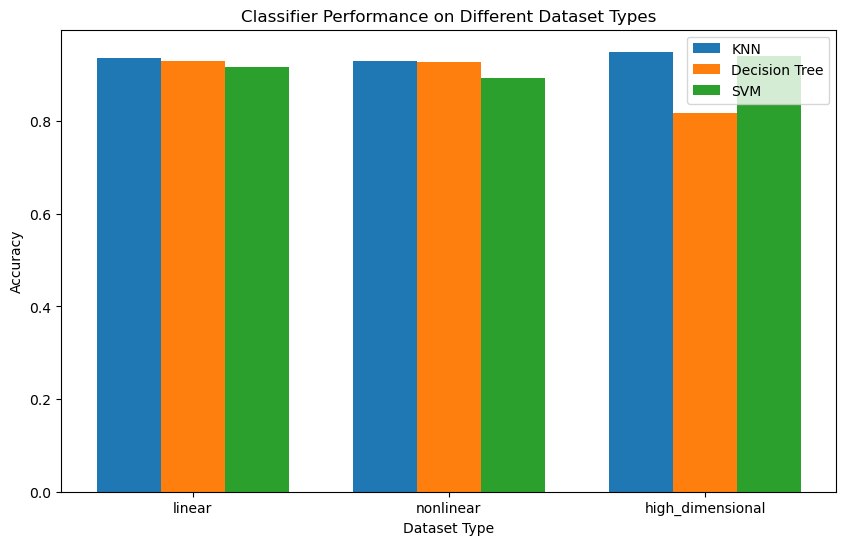

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Generate synthetic datasets with different underlying distributions
def generate_dataset(type="linear", n_samples=1000, noise=0.1):
    if type == "linear":
        X, y = make_classification(
            n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42
        )
    elif type == "nonlinear":
        X, y = make_classification(
            n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
            class_sep=0.5, random_state=42
        )
        X += noise * np.random.randn(*X.shape)
    elif type == "high_dimensional":
        X, y = make_classification(
            n_samples=n_samples, n_features=20, n_informative=10, n_redundant=10, random_state=42
        )
    else:
        raise ValueError("Unsupported dataset type")
    return X, y

# Classifiers to compare
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Evaluate classifiers on different datasets
dataset_types = ["linear", "nonlinear", "high_dimensional"]
results = {classifier: [] for classifier in classifiers.keys()}

for dataset_type in dataset_types:
    print(f"Evaluating on {dataset_type} dataset")
    X, y = generate_dataset(type=dataset_type)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name].append(accuracy)
        print(f"  {name} Accuracy: {accuracy:.2f}")

# Plot results
x = np.arange(len(dataset_types))
width = 0.25

plt.figure(figsize=(10, 6))
for i, (name, accuracies) in enumerate(results.items()):
    plt.bar(x + i * width, accuracies, width, label=name)

plt.xticks(x + width, dataset_types)
plt.xlabel("Dataset Type")
plt.ylabel("Accuracy")
plt.title("Classifier Performance on Different Dataset Types")
plt.legend()
plt.show()


## No Free Lunch Theorem and Generalization Error

## Introduction

The No Free Lunch (NFL) Theorem states that no learning algorithm performs uniformly better than another over all possible problems. In this notebook, we delve into the theorem, its implications, and an example demonstrating its effects.

### Expected Off-Training Set Classification Error

The expected off-training set classification error when the true function is $ F(x) $ and the candidate learning algorithm is $ P_k(h(x)|D) $ is given by:

$$ 
E_k(E|F, n) = \sum_{x \notin D} P(x) [1 - \delta(F(x), h(x))] P_k(h(x)|D) 
$$

where:
- $ P(x) $ is the probability of an input $ x $,
- $ \delta(a, b) $ is the Kronecker delta function ($ \delta(a, b) = 1 $ if $ a = b $, otherwise $ 0 $),
- $ P_k(h(x)|D) $ is the probability of hypothesis $ h(x) $ given data $ D $.



### Theorem : No Free Lunch

For any two learning algorithms $ P_1(h|D) $ and $ P_2(h|D) $, the following are true:
1. Uniformly averaged over all target functions 4 F $:
   $$ 
   E_1(E|F, n) - E_2(E|F, n) = 0 
   $$
2. For any fixed training set $ D $, uniformly averaged over $ F $:
   $$ 
   E_1(E|F, D) - E_2(E|F, D) = 0 
   $$
3. Uniformly averaged over all priors $ P(F) $:
   $$ 
   E_1(E|n) - E_2(E|n) = 0 
   $$
4. For any fixed training set $ D $, uniformly averaged over $ P(F) $:
   $$ 
   E_1(E|D) - E_2(E|D) = 0 
   $$

## Example 1: Binary Data

We demonstrate the NFL theorem using binary input vectors and target functions $ F(x) $.

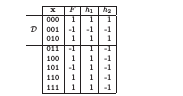

### Target Function $ F(x) $ and Hypotheses $ h_1, h_2 $

| $ x $   | $ F(x) $ | $ h_1(x) $ | $ h_2(x) $ |
|-----------|-----------|--------------|--------------|
| 000       | 1         | 1            | 1            |
| 001       | -1        | -1           | -1           |
| 010       | 1         | 1            | 1            |
| 011       | -1        | 1            | -1           |
| 100       | 1         | 1            | -1           |
| 101       | -1        | 1            | -1           |
| 110       | 1         | 1            | -1           |
| 111       | 1         | 1            | -1           |

Algorithm $ h_1 $ assumes all patterns are $ \omega_1 $ unless trained otherwise. Algorithm $ h_2 $ assumes all patterns are $ \omega_2 $ unless trained otherwise.

### Results

- For $ F(x) $, $ h_1 $ has an off-training set error of $ 0.4 $ and $ h_2 $ has an error of $ 0.6 $.
- Averaged over all target functions, $ h_1 $ and $ h_2 $ yield identical average errors, satisfying the NFL theorem.

## Implications of NFL

1. **Performance Trade-offs:** Algorithms that perform well on certain problems will necessarily perform poorly on others.
2. **No Universal Algorithm:** No algorithm is inherently better than another across all tasks.
3. **Relevance of Assumptions:** Performance depends on matching the algorithm to the specific problem domain.

### Visualization

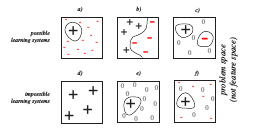

Fig.1: The No Free Lunch Theorem shows the generalization performance on the oﬀ-training set data that can be achieved (top row), and the performance that cannot be achieved (bottom row). Each square represents all possible classiﬁcation problems consistent with the training data — this is not the familiar feature space. A + indicates that the classiﬁcation algorithm has generalization higher than average, a - indicates lower than average, and a 0 indicates average performance. The size of a symbol indicates the amount by which the performance diﬀers from the average. For instance, a) shows that it is possible for an algorithm to have high accuracy on a small set of problems so long as it has mildly poor performance on all other problems. Likewise, b) shows that it is possible to have excellent performance throughout a large range of problem but this will be balanced by very poor performance on a large range of other problems. It is impossible, however, to have good performance throughout the full range of problems, shown in d). It is also impossible to have higher than average performance on some problems, and average performance everywhere else, shown in e).

Below, we illustrate possible generalization performance scenarios:

- **Case A:** Good performance on a small set of problems, poor on others.
- **Case B:** Excellent performance over a large range, poor elsewhere.
- **Case D:** Uniformly good performance (impossible due to NFL).
- **Case E:** Above-average performance on some problems, average on others (impossible due to NFL).

### Next Steps

Practitioners must understand problem domains, evaluate assumptions, and select algorithms tailored to the specific task. Experimentation and domain knowledge are crucial to achieving optimal results.


In [3]:
# No Free Lunch Theorem Implementation in Python

import numpy as np
from itertools import product

# Helper function for Kronecker delta
def delta(a, b):
    return 1 if a == b else 0

# Generate all possible binary target functions for n-bit inputs
def generate_target_functions(num_bits):
    inputs = list(product([0, 1], repeat=num_bits))
    num_functions = 2 ** len(inputs)
    return [list(product([-1, 1], repeat=len(inputs))) for _ in range(num_functions)]

# Compute expected error for a hypothesis given a target function and data
def compute_expected_error(target_function, hypothesis, data, prob_x):
    """
    Computes the expected off-training-set classification error.
    """
    error = 0
    for x, p_x in prob_x.items():
        if x not in data:
            error += p_x * (1 - delta(target_function[x], hypothesis(x)))  # Call hypothesis as a function
    return error


# Simulate the NFL theorem

def simulate_nfl(num_bits, training_set_size):
    inputs = list(product([0, 1], repeat=num_bits))
    prob_x = {x: 1 / len(inputs) for x in inputs}  # Uniform distribution

    # Generate random training set
    training_set = np.random.choice(len(inputs), training_set_size, replace=False)

    # Generate all target functions
    target_functions = generate_target_functions(num_bits)

    # Define two simple hypotheses
    def hypothesis_1(x):
        return 1  # Always predicts 1

    def hypothesis_2(x):
        return -1  # Always predicts -1

    errors_h1 = []
    errors_h2 = []

    for target_function in target_functions:
        # Map target_function to inputs
        target_map = {inputs[i]: target_function[i] for i in range(len(inputs))}

        # Compute errors
        error_h1 = compute_expected_error(target_map, hypothesis_1, training_set, prob_x)
        error_h2 = compute_expected_error(target_map, hypothesis_2, training_set, prob_x)

        errors_h1.append(error_h1)
        errors_h2.append(error_h2)

    avg_error_h1 = np.mean(errors_h1)
    avg_error_h2 = np.mean(errors_h2)

    return avg_error_h1, avg_error_h2

# Example usage
if __name__ == "__main__":
    num_bits = 3
    training_set_size = 3
    avg_error_h1, avg_error_h2 = simulate_nfl(num_bits, training_set_size)

    print(f"Average Error for Hypothesis 1: {avg_error_h1}")
    print(f"Average Error for Hypothesis 2: {avg_error_h2}")


Average Error for Hypothesis 1: 1.0
Average Error for Hypothesis 2: 1.0


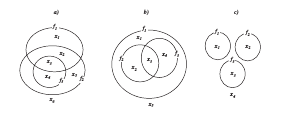

Fig.2: Patterns $x_i$ , represented as d-tuples of binary features $f_i$ , can be placed in Venn diagram (here d = 3); the diagram itself depends upon the classiﬁcation problem and its constraints. For instance, suppose f1 is the binary feature attribute has legs, f2 is has right arm and f3 the attribute has right hand. Thus in part a) pattern x_1 denotes a person who has legs but neither arm nor hand; x2 a person who has legs and an arm, but no hand; and so on. Notice that the Venn diagram expresses the biological constraints associated with real people: it is impossible for someone to have a right hand but no right arm. Part c) expresses diﬀerent constraints, such as the biological constraint of mutually exclusive eye colors. Thus attributes f1 , f2 and f3 might denote brown, green and blue respectively and a pattern xi describes a real person, whom we can assume cannot have eyes that diﬀer in color.

## Ugly Duckling Theorem

The Ugly Duckling Theorem addresses the limitations of feature representations and pattern similarity in the absence of domain-specific assumptions. This theorem highlights that **all features are equally relevant** when there are no guiding principles for selecting features. 

Theorem states:
> *In the absence of prior assumptions, there is no privileged feature representation, and no two distinct patterns are more or less similar than others if similarity is based solely on the shared predicates.*

---

## Feature Representation and Patterns

Consider patterns represented as **d-tuples of binary features** $f_i$. A pattern may be described using **logical predicates**, such as:
- $f_1 \land f_2$ (pattern has both features $f_1$ and $f_2$)
- $\neg f_2$ (pattern lacks feature $f_2$)

Patterns can be visualized using **Venn diagrams**. For example:
- $f_1$: Has legs
- $f_2$: Has a right arm
- $f_3$: Has a right hand

### Example 1: Constraints on Feature Representation
Let $f_1, f_2, f_3$ represent biological attributes. A Venn diagram in Figure 9.2 (part a) represents patterns such as:
- $x_1$: Person with legs but no arms or hands
- $x_2$: Person with legs and an arm, but no hand

Biological constraints make some configurations (e.g., hand but no arm) impossible.

---

## Counting Predicates

### Venn Diagram without Constraints
A general Venn diagram, such as Fig.3, allows every configuration of $f_1$ and $f_2$. For two features:
1. Rank $r = 1$: Simple predicates like $f_1$ or $\neg f_2$
2. Rank $r = 2$: Predicates like $f_1 \land f_2$
3. Rank $r = 3$: More complex predicates involving three regions.

The **total number of predicates** in the absence of constraints is given by:
$$
n = 2^d
$$
where $d$ is the number of regions in the Venn diagram.

---
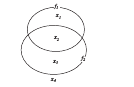

Fig.3: The Venn for a problem with no constraints on two features. Thus all four binary attribute vectors can occur.


### Similarity Between Patterns

Consider patterns $x_i$ and $x_j$, $i \neq j$. Similarity is measured by the number of predicates shared by both patterns.

1. Rank $r = 1$: No shared predicates
2. Rank $r = 2$: One predicate, e.g., $x_i \lor x_j$
3. Rank $r = 3$: $\binom{d-2}{1} = d - 2$ predicates shared.

The total number of predicates shared by $x_i$ and $x_j$ is:
$$
\sum_{r=2}^d \binom{d-2}{r-2} = 2^{d-2}
$$
This **result is independent of the choice of patterns** $x_i$ and $x_j$.

---

## The Ugly Duckling Theorem

### Formal Statement
- **Shared Predicates:** The number of predicates shared by any two distinct patterns is constant.
- **Implication:** If similarity is based on shared predicates, **all pairs of patterns are equally similar**.

### Conclusion
The theorem highlights the absence of a problem-independent measure of similarity. Instead, **similarity depends on implicit assumptions about the domain**.

---

## Insights and Practical Takeaways
1. **Feature Relevance:** There is no universally "best" set of features.
2. **Assumptions are Key:** Even similarity measures depend on domain-specific assumptions.
3. **Practical Implications:** Effective learning requires informed choices about features and representations.

---

## References
- The Ugly Duckling Theorem in classification theory
- Logical predicates and Venn diagrams for feature spaces



In [4]:
import itertools

# Define patterns and features
def generate_patterns(features):
    """
    Generate all possible patterns given a set of features.
    Each pattern is represented as a binary tuple.
    """
    return list(itertools.product([0, 1], repeat=len(features)))


def count_shared_predicates(pattern1, pattern2, features):
    """
    Count the number of shared predicates between two patterns.
    A shared predicate is a logical statement that holds true for both patterns.
    """
    shared_count = 0
    num_features = len(features)

    # Generate all possible logical predicates for the given features
    for r in range(1, num_features + 1):
        for combo in itertools.combinations(features, r):
            predicate = lambda p: all(p[features.index(f)] for f in combo)
            if predicate(pattern1) == predicate(pattern2):
                shared_count += 1

    return shared_count


# Example Usage
features = ['f1', 'f2', 'f3']  # Define the binary features
patterns = generate_patterns(features)

# Print all patterns
print("Generated Patterns:")
for i, pattern in enumerate(patterns):
    print(f"x{i + 1}: {pattern}")

# Compute similarity between each pair of patterns
print("\nSimilarity Between Patterns:")
for i, p1 in enumerate(patterns):
    for j, p2 in enumerate(patterns):
        if i < j:  # Compare unique pairs
            shared_predicates = count_shared_predicates(p1, p2, features)
            print(f"Shared predicates between x{i + 1} and x{j + 1}: {shared_predicates}")



Generated Patterns:
x1: (0, 0, 0)
x2: (0, 0, 1)
x3: (0, 1, 0)
x4: (0, 1, 1)
x5: (1, 0, 0)
x6: (1, 0, 1)
x7: (1, 1, 0)
x8: (1, 1, 1)

Similarity Between Patterns:
Shared predicates between x1 and x2: 6
Shared predicates between x1 and x3: 6
Shared predicates between x1 and x4: 4
Shared predicates between x1 and x5: 6
Shared predicates between x1 and x6: 4
Shared predicates between x1 and x7: 4
Shared predicates between x1 and x8: 0
Shared predicates between x2 and x3: 5
Shared predicates between x2 and x4: 5
Shared predicates between x2 and x5: 5
Shared predicates between x2 and x6: 5
Shared predicates between x2 and x7: 3
Shared predicates between x2 and x8: 1
Shared predicates between x3 and x4: 5
Shared predicates between x3 and x5: 5
Shared predicates between x3 and x6: 3
Shared predicates between x3 and x7: 5
Shared predicates between x3 and x8: 1
Shared predicates between x4 and x5: 3
Shared predicates between x4 and x6: 3
Shared predicates between x4 and x7: 3
Shared predicates b

## Minimum Description Length (MDL) Principle

The **Minimum Description Length (MDL)** principle aims to find a balance between the complexity of a model and its ability to describe the observed data. It identifies the best model as the one that minimizes the total description length of:

1. **The model itself** (complexity).
2. **The data given the model** (error or residuals).

## Formal Definition

The MDL principle minimizes the combined description length:

$$
K(h, D) = K(h) + K(D \text{ using } h)
$$

Where:
- $K(h)$: Algorithmic complexity of the model $h$.
- $K(D \text{ using } h)$: Description length of the data $D$ with respect to the model $h$.

The optimal model $h^*$ is:

$$
h^* = \arg\min_h K(h, D)
$$

---

## Algorithmic Complexity

Algorithmic complexity, or **Kolmogorov complexity**, measures the shortest possible description of a string \(x\) using a universal Turing machine. It provides an objective measure of simplicity.

### Examples of Algorithmic Complexity

1. **String of $n$ 1s**:
   $$K(x) = O(\log_2 n)$$
   This is because the repetition can be described compactly using a loop.

2. **Digits of $\pi$**:
   $$K(\pi) = O(1)$$
   The complexity is constant because $\pi$ is defined by a simple program.

3. **Truly Random Binary String**:
   $$K(x) \approx |x|$$
   The complexity is proportional to the length of $x$ since it cannot be compressed further.

---

## Application to Classifier Design

In designing classifiers, the MDL principle balances two components:

1. **Model Complexity $(K(h)$):**
   - Reflects the simplicity of the model. For example, a decision tree with fewer nodes has lower complexity.

2. **Data Complexity $(K(D \text{ using } h)$):**
   - Measures the entropy of the data given the model. In a decision tree, this is the weighted entropy of the data at leaf nodes.

### Combined Objective

The MDL principle seeks to minimize:

$$
K(h, D) = K(h) + K(D \text{ using } h)
$$

By pruning decision trees or simplifying models, the overall description length is reduced, ensuring better generalization.

---

## Properties of MDL

1. **Convergence with More Data:**
   Classifiers designed using MDL converge to the true model as the data size increases.

2. **Avoiding Overfitting:**
   MDL discourages overly complex models, focusing instead on simpler, more generalizable ones.

3. **Bayesian Interpretation:**
   The MDL principle aligns with Bayesian inference:

   $$
   P(h|D) = \frac{P(h)P(D|h)}{P(D)}
   $$

   Where:
   - $K(h) \sim -\log P(h)$: Represents the prior complexity of the model.
   - $K(D \text{ using } h) \sim -\log P(D|h)$: Represents the data likelihood.

---

## Challenges with MDL

1. **Computational Difficulty:**
   Finding the shortest description or "best" representation requires searching through all possible models, which is computationally expensive.

2. **Finite Data Limitations:**
   While MDL guarantees convergence to the true model with infinite data, its performance with finite data depends on the specific implementation.

---

## Relation to the No Free Lunch Theorem

The MDL principle cannot universally guarantee superior performance across all problems. The **No Free Lunch Theorem** states that no single classifier or learning algorithm is optimal for all possible problems. MDL is effective when its assumptions align with the specific problem domain.

---

## Practical Applications

1. **Decision Trees:** 
   - Pruning decision trees to minimize total complexity $(K(h) + K(D \text{ using } h)$).
   
2. **Model Selection:** 
   - Choosing between classifiers (e.g., neural networks, SVMs) based on their description length.

3. **Compression-Based Learning:** 
   - Discovering patterns or regularities in data by seeking compact representations.

---

## Conclusion

The MDL principle combines simplicity and generalizability, making it a powerful tool for designing effective classifiers. However, its reliance on computational feasibility and domain-specific assumptions requires careful application.


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)

# Train a decision tree classifier
def train_decision_tree(X, y, max_depth=None):
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X, y)
    return tree

# Compute description length
# 1. Model complexity: Number of nodes in the tree
# 2. Data description length: Negative log-likelihood of predictions
def mdl(tree, X, y):
    # Model complexity (number of nodes in the tree)
    tree_rules = export_text(tree, feature_names=[f"Feature_{i}" for i in range(X.shape[1])])
    model_complexity = len(tree_rules.splitlines())

    # Data description length (log-loss of predictions)
    y_pred_proba = tree.predict_proba(X)
    data_complexity = log_loss(y, y_pred_proba)

    # Total MDL
    total_mdl = model_complexity + data_complexity
    return total_mdl, model_complexity, data_complexity

# Experiment with trees of different depths
results = []
for max_depth in range(1, 11):
    tree = train_decision_tree(X, y, max_depth=max_depth)
    total_mdl, model_complexity, data_complexity = mdl(tree, X, y)
    results.append((max_depth, total_mdl, model_complexity, data_complexity))

# Display results
print("Depth | Total MDL | Model Complexity | Data Complexity")
for depth, total, model, data in results:
    print(f"{depth:<5} | {total:.4f}     | {model:<16} | {data:.4f}")

# Plot results
import matplotlib.pyplot as plt

max_depths = [r[0] for r in results]
total_mdls = [r[1] for r in results]
model_complexities = [r[2] for r in results]
data_complexities = [r[3] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(max_depths, total_mdls, label="Total MDL", marker='o')
plt.plot(max_depths, model_complexities, label="Model Complexity", marker='s')
plt.plot(max_depths, data_complexities, label="Data Complexity", marker='^')
plt.xlabel("Tree Depth")
plt.ylabel("Description Length")
plt.title("MDL Components vs. Tree Depth")
plt.legend()
plt.grid()
plt.show()


In [5]:
import math

# Generate synthetic dataset (manual implementation)
def generate_classification_data(n_samples, n_features):
    import random
    X = [[random.uniform(0, 1) for _ in range(n_features)] for _ in range(n_samples)]
    y = [random.randint(0, 1) for _ in range(n_samples)]
    return X, y

# Train a simple decision tree classifier (manual implementation)
def train_decision_tree(X, y, max_depth):
    class Node:
        def __init__(self, depth=0):
            self.depth = depth
            self.threshold = None
            self.feature = None
            self.left = None
            self.right = None
            self.is_leaf = False
            self.prediction = None

    def split_data(X, y, feature, threshold):
        left_X, left_y, right_X, right_y = [], [], [], []
        for i in range(len(X)):
            if X[i][feature] <= threshold:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])
        return left_X, left_y, right_X, right_y

    def calculate_gini(y):
        if not y:
            return 0
        p = sum(y) / len(y)
        return 2 * p * (1 - p)

    def find_best_split(X, y):
        best_gini, best_feature, best_threshold = float('inf'), None, None
        for feature in range(len(X[0])):
            thresholds = sorted(set(row[feature] for row in X))
            for threshold in thresholds:
                left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
                gini = (len(left_y) * calculate_gini(left_y) + len(right_y) * calculate_gini(right_y)) / len(y)
                if gini < best_gini:
                    best_gini, best_feature, best_threshold = gini, feature, threshold
        return best_feature, best_threshold

    def build_tree(X, y, depth):
        if depth == max_depth or len(set(y)) == 1:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        feature, threshold = find_best_split(X, y)
        if feature is None:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
        if not left_y or not right_y:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        node = Node(depth)
        node.feature = feature
        node.threshold = threshold
        node.left = build_tree(left_X, left_y, depth + 1)
        node.right = build_tree(right_X, right_y, depth + 1)
        return node

    return build_tree(X, y, 0)

# Calculate Minimum Description Length (MDL)
def mdl(tree, X, y):
    def count_nodes(node):
        if not node or node.is_leaf:
            return 1
        return 1 + count_nodes(node.left) + count_nodes(node.right)

    def log_loss(y_true, y_pred):
        eps = 1e-15
        loss = 0
        for yt, yp in zip(y_true, y_pred):
            yp = max(min(yp, 1 - eps), eps)
            loss += -yt * math.log(yp) - (1 - yt) * math.log(1 - yp)
        return loss / len(y_true)

    def predict(node, row):
        if node.is_leaf:
            return node.prediction
        if row[node.feature] <= node.threshold:
            return predict(node.left, row)
        return predict(node.right, row)

    model_complexity = count_nodes(tree)
    predictions = [predict(tree, row) for row in X]
    data_complexity = log_loss(y, predictions)
    return model_complexity + data_complexity, model_complexity, data_complexity

# Generate data
X, y = generate_classification_data(100, 5)

# Evaluate trees of different depths
results = []
for max_depth in range(1, 6):
    tree = train_decision_tree(X, y, max_depth)
    total_mdl, model_complexity, data_complexity = mdl(tree, X, y)
    results.append((max_depth, total_mdl, model_complexity, data_complexity))

# Display results
print("Depth | Total MDL | Model Complexity | Data Complexity")
for depth, total, model, data in results:
    print(f"{depth:<5} | {total:.4f}     | {model:<16} | {data:.4f}")


Depth | Total MDL | Model Complexity | Data Complexity
1     | 18.1971     | 3                | 15.1971
2     | 19.5066     | 5                | 14.5066
3     | 20.0526     | 9                | 11.0526
4     | 23.6349     | 15               | 8.6349
5     | 29.5625     | 23               | 6.5625


In [6]:
import math

# Generate synthetic dataset (manual implementation)
def generate_classification_data(n_samples, n_features):
    import random
    X = [[random.uniform(0, 1) for _ in range(n_features)] for _ in range(n_samples)]
    y = [random.randint(0, 1) for _ in range(n_samples)]
    return X, y

# Train a simple decision tree classifier (manual implementation)
def train_decision_tree(X, y, max_depth):
    class Node:
        def __init__(self, depth=0):
            self.depth = depth
            self.threshold = None
            self.feature = None
            self.left = None
            self.right = None
            self.is_leaf = False
            self.prediction = None

    def split_data(X, y, feature, threshold):
        left_X, left_y, right_X, right_y = [], [], [], []
        for i in range(len(X)):
            if X[i][feature] <= threshold:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])
        return left_X, left_y, right_X, right_y

    def calculate_gini(y):
        if not y:
            return 0
        p = sum(y) / len(y)
        return 2 * p * (1 - p)

    def find_best_split(X, y):
        best_gini, best_feature, best_threshold = float('inf'), None, None
        for feature in range(len(X[0])):
            thresholds = sorted(set(row[feature] for row in X))
            for threshold in thresholds:
                left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
                gini = (len(left_y) * calculate_gini(left_y) + len(right_y) * calculate_gini(right_y)) / len(y)
                if gini < best_gini:
                    best_gini, best_feature, best_threshold = gini, feature, threshold
        return best_feature, best_threshold

    def build_tree(X, y, depth):
        if depth == max_depth or len(set(y)) == 1:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        feature, threshold = find_best_split(X, y)
        if feature is None:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
        if not left_y or not right_y:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        node = Node(depth)
        node.feature = feature
        node.threshold = threshold
        node.left = build_tree(left_X, left_y, depth + 1)
        node.right = build_tree(right_X, right_y, depth + 1)
        return node

    return build_tree(X, y, 0)

# Calculate Minimum Description Length (MDL)
def mdl(tree, X, y):
    def count_nodes(node):
        if not node or node.is_leaf:
            return 1
        return 1 + count_nodes(node.left) + count_nodes(node.right)

    def log_loss(y_true, y_pred):
        eps = 1e-15
        loss = 0
        for yt, yp in zip(y_true, y_pred):
            yp = max(min(yp, 1 - eps), eps)
            loss += -yt * math.log(yp) - (1 - yt) * math.log(1 - yp)
        return loss / len(y_true)

    def predict(node, row):
        if node.is_leaf:
            return node.prediction
        if row[node.feature] <= node.threshold:
            return predict(node.left, row)
        return predict(node.right, row)

    model_complexity = count_nodes(tree)
    predictions = [predict(tree, row) for row in X]
    data_complexity = log_loss(y, predictions)
    return model_complexity + data_complexity, model_complexity, data_complexity

# Generate data
X, y = generate_classification_data(100, 5)

# Evaluate trees of different depths
results = []
for max_depth in range(1, 6):
    tree = train_decision_tree(X, y, max_depth)
    total_mdl, model_complexity, data_complexity = mdl(tree, X, y)
    results.append((max_depth, total_mdl, model_complexity, data_complexity))

# Display results
print("Depth | Total MDL | Model Complexity | Data Complexity")
for depth, total, model, data in results:
    print(f"{depth:<5} | {total:.4f}     | {model:<16} | {data:.4f}")

# Plotting results (manual implementation)
def plot_results(results):
    def scale(values, scale_min, scale_max):
        min_val, max_val = min(values), max(values)
        return [(v - min_val) / (max_val - min_val) * (scale_max - scale_min) + scale_min for v in values]

    depths = [r[0] for r in results]
    total_mdl = [r[1] for r in results]
    model_complexity = [r[2] for r in results]
    data_complexity = [r[3] for r in results]

    total_mdl_scaled = scale(total_mdl, 1, 20)
    model_complexity_scaled = scale(model_complexity, 1, 20)
    data_complexity_scaled = scale(data_complexity, 1, 20)

    for i, depth in enumerate(depths):
        print("|" + " " * (depth - 1) + "* Total MDL".ljust(25), "|".rjust(int(total_mdl_scaled[i])))
        print("|" + " " * (depth - 1) + "- Model Complexity".ljust(25), "|".rjust(int(model_complexity_scaled[i])))
        print("|" + " " * (depth - 1) + "+ Data Complexity".ljust(25), "|".rjust(int(data_complexity_scaled[i])))

# Plot results
plot_results(results)


Depth | Total MDL | Model Complexity | Data Complexity
1     | 19.2336     | 3                | 16.2336
2     | 19.5063     | 5                | 14.5063
3     | 20.7434     | 9                | 11.7434
4     | 23.0163     | 13               | 10.0163
5     | 26.5986     | 19               | 7.5986
|* Total MDL               |
|- Model Complexity        |
|+ Data Complexity                            |
| * Total MDL               |
| - Model Complexity          |
| + Data Complexity                        |
|  * Total MDL                  |
|  - Model Complexity               |
|  + Data Complexity                  |
|   * Total MDL                        |
|   - Model Complexity                   |
|   + Data Complexity              |
|    * Total MDL                                  |
|    - Model Complexity                           |
|    + Data Complexity         |


Depth | Total MDL | Model Complexity | Data Complexity
1     | 18.8878     | 3                | 15.8878
2     | 18.4701     | 5                | 13.4701
3     | 22.1247     | 9                | 13.1247
4     | 24.3980     | 13               | 11.3980
5     | 25.9803     | 17               | 8.9803


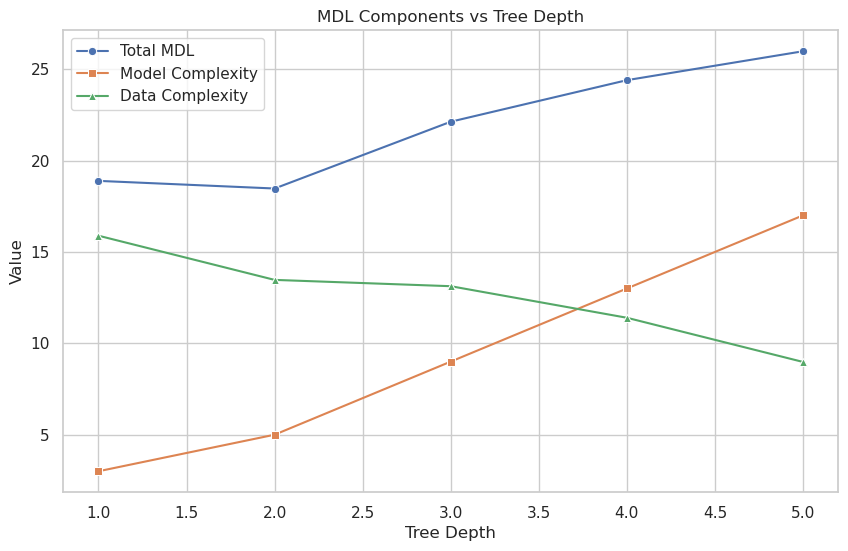

In [7]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic dataset (manual implementation)
def generate_classification_data(n_samples, n_features):
    import random
    X = [[random.uniform(0, 1) for _ in range(n_features)] for _ in range(n_samples)]
    y = [random.randint(0, 1) for _ in range(n_samples)]
    return X, y

# Train a simple decision tree classifier (manual implementation)
def train_decision_tree(X, y, max_depth):
    class Node:
        def __init__(self, depth=0):
            self.depth = depth
            self.threshold = None
            self.feature = None
            self.left = None
            self.right = None
            self.is_leaf = False
            self.prediction = None

    def split_data(X, y, feature, threshold):
        left_X, left_y, right_X, right_y = [], [], [], []
        for i in range(len(X)):
            if X[i][feature] <= threshold:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])
        return left_X, left_y, right_X, right_y

    def calculate_gini(y):
        if not y:
            return 0
        p = sum(y) / len(y)
        return 2 * p * (1 - p)

    def find_best_split(X, y):
        best_gini, best_feature, best_threshold = float('inf'), None, None
        for feature in range(len(X[0])):
            thresholds = sorted(set(row[feature] for row in X))
            for threshold in thresholds:
                left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
                gini = (len(left_y) * calculate_gini(left_y) + len(right_y) * calculate_gini(right_y)) / len(y)
                if gini < best_gini:
                    best_gini, best_feature, best_threshold = gini, feature, threshold
        return best_feature, best_threshold

    def build_tree(X, y, depth):
        if depth == max_depth or len(set(y)) == 1:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        feature, threshold = find_best_split(X, y)
        if feature is None:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
        if not left_y or not right_y:
            leaf = Node(depth)
            leaf.is_leaf = True
            leaf.prediction = max(set(y), key=y.count)
            return leaf

        node = Node(depth)
        node.feature = feature
        node.threshold = threshold
        node.left = build_tree(left_X, left_y, depth + 1)
        node.right = build_tree(right_X, right_y, depth + 1)
        return node

    return build_tree(X, y, 0)

# Calculate Minimum Description Length (MDL)
def mdl(tree, X, y):
    def count_nodes(node):
        if not node or node.is_leaf:
            return 1
        return 1 + count_nodes(node.left) + count_nodes(node.right)

    def log_loss(y_true, y_pred):
        eps = 1e-15
        loss = 0
        for yt, yp in zip(y_true, y_pred):
            yp = max(min(yp, 1 - eps), eps)
            loss += -yt * math.log(yp) - (1 - yt) * math.log(1 - yp)
        return loss / len(y_true)

    def predict(node, row):
        if node.is_leaf:
            return node.prediction
        if row[node.feature] <= node.threshold:
            return predict(node.left, row)
        return predict(node.right, row)

    model_complexity = count_nodes(tree)
    predictions = [predict(tree, row) for row in X]
    data_complexity = log_loss(y, predictions)
    return model_complexity + data_complexity, model_complexity, data_complexity

# Generate data
X, y = generate_classification_data(100, 5)

# Evaluate trees of different depths
results = []
for max_depth in range(1, 6):
    tree = train_decision_tree(X, y, max_depth)
    total_mdl, model_complexity, data_complexity = mdl(tree, X, y)
    results.append((max_depth, total_mdl, model_complexity, data_complexity))

# Display results
print("Depth | Total MDL | Model Complexity | Data Complexity")
for depth, total, model, data in results:
    print(f"{depth:<5} | {total:.4f}     | {model:<16} | {data:.4f}")

# Plotting results using seaborn
def plot_results(results):
    depths = [r[0] for r in results]
    total_mdl = [r[1] for r in results]
    model_complexity = [r[2] for r in results]
    data_complexity = [r[3] for r in results]

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    sns.lineplot(x=depths, y=total_mdl, marker='o', label='Total MDL')
    sns.lineplot(x=depths, y=model_complexity, marker='s', label='Model Complexity')
    sns.lineplot(x=depths, y=data_complexity, marker='^', label='Data Complexity')

    plt.title('MDL Components vs Tree Depth')
    plt.xlabel('Tree Depth')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Plot results
plot_results(results)


## Minimum Description Length (MDL), Occam's Razor, and the Bias-Variance Tradeoff

### Minimum Description Length (MDL)

### Bayes and MDL Connection

The MDL principle relates closely to Bayesian methods. Bayes' theorem can be written as:

$$
P(h|D) = \frac{P(h)P(D|h)}{P(D)}
$$

The optimal hypothesis $ h^* $ is the one that maximizes the posterior probability:

$$
h^* = \arg\max_h P(h|D) = \arg\max_h [P(h)P(D|h)] = \arg\max_h [\log_2 P(h) + \log_2 P(D|h)]
$$

Shannon's optimal coding theorem establishes that the cost of representing a string $ x $ is bounded below by $ -\log_2 P(x) $. This links the MDL principle:

$$
K(h, D) = K(h) + K(D \text{ using } h)
$$

to Bayesian approaches. The MDL principle prefers simpler models, effectively acting as a bias toward simplicity.

---

## Overfitting Avoidance and Occam’s Razor

Overfitting avoidance involves techniques such as regularization and pruning. While the No Free Lunch theorem shows there is no universal best classifier, Occam's Razor often guides the selection of simpler classifiers when they suffice for the problem.

Occam's Razor states that "entities should not be multiplied beyond necessity," implying that unnecessary complexity should be avoided:

- Simpler classifiers are often computationally efficient.
- Simpler methods are empirically effective for many real-world problems.

---

## Bias and Variance Tradeoff

Given the absence of a universally optimal classifier, practitioners often consider **bias** and **variance** to assess model suitability:

### Bias and Variance Decomposition

For regression, with a true target function $ F(x) $, and an estimated function $ g(x; D) $, the mean squared error (MSE) can be decomposed as:

$$
\mathbb{E}_D[(g(x; D) - F(x))^2] = (\mathbb{E}_D[g(x; D)] - F(x))^2 + \mathbb{E}_D[(g(x; D) - \mathbb{E}_D[g(x; D)])^2]
$$

- **Bias**: $ (\mathbb{E}_D[g(x; D)] - F(x))^2 $
- **Variance**: $ \mathbb{E}_D[(g(x; D) - \mathbb{E}_D[g(x; D)])^2] $

### Key Observations

1. **High Bias, Low Variance**:
   - Model is too simple to capture the complexity of $ F(x) $.
   - Example: A linear model for a nonlinear function.

2. **Low Bias, High Variance**:
   - Model is too flexible, overfitting the training data.
   - Example: High-degree polynomial regression.

3. **Tradeoff**:
   - Increasing flexibility reduces bias but increases variance.
   - Optimal performance balances bias and variance.

---

### Visualization Example

For a cubic target function $ F(x) $:

- **Column a)**: Fixed linear model $( g(x) = c $) with high bias, zero variance.
- **Column b)**: Improved fixed model ($ g(x) $) with lower bias, zero variance.
- **Column c)**: Trainable cubic model with low bias, higher variance.
- **Column d)**: Linear model with trainable parameters; moderate bias and variance.

The interplay between bias and variance underscores the importance of prior information or model selection tailored to the problem.

---
## Bias and Variance in Regression and Classification

### Bias and Variance in Regression

### The Bias-Variance Dilemma

The bias-variance dilemma is a fundamental concept in regression. For a true function $ F(x) $ with noise, we approximate $ F(x) $ using $ g(x; D) $, which depends on a training set $ D $. The effectiveness of this approximation is measured using the mean-square error (MSE):

$$
\mathbb{E}_D[(g(x; D) - F(x))^2] = (\mathbb{E}_D[g(x; D)] - F(x))^2 + \mathbb{E}_D[(g(x; D) - \mathbb{E}_D[g(x; D)])^2]
$$

- **Bias**: $ (\mathbb{E}_D[g(x; D)] - F(x))^2 $ measures how far the expected estimate is from the true function.
- **Variance**: $ \mathbb{E}_D[(g(x; D) - \mathbb{E}_D[g(x; D)])^2] $ measures variability due to different training sets.

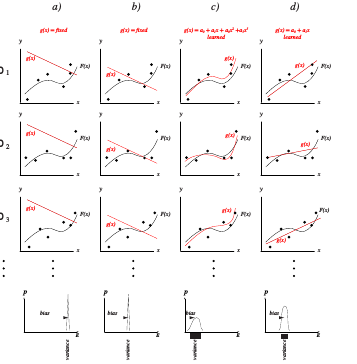

Fig.4: The bias-variance dilemma can be illustrated in the domain of regression. Each column represents a diﬀerent model, each row a diﬀerent set of n = 6 training points, Di , randomly sampled from the true function F (x) with noise. Histograms of the mean-square error of E ≡ ED [(g(x) − F (x))2 ] of Eq. 11 are shown at the bottom. Column a) shows a very poor model: a linear g(x) whose parameters are held ﬁxed, independent of the training data. This model has high bias and zero variance. Column b) shows a somewhat better model, though it too is held ﬁxed, independent of the training data. It has a lower bias than in a) and the same zero variance. Column c) shows a cubic model, where the parameters are trained to best ﬁt the training samples in a mean-square error sense. This model has low bias, and a moderate variance. Column d) shows a linear model that is adjusted to ﬁt each training set; this model has intermediate bias and variance. If these models were instead trained with a very large number n → ∞ of points, the bias in c) would approach a small value (which depends upon the noise), while the bias in d) would not; the variance of all models would approach zero.

### Illustration (Fig.4)

1. **Column (a)**: A fixed linear function $ g(x) $ independent of training data:
   - High bias, as it poorly approximates $ F(x) $.
   - Zero variance, as $ g(x) $ does not change across data sets.

2. **Column (b)**: A better fixed model $ g(x) $:
   - Lower bias than (a), same zero variance.

3. **Column (c)**: A cubic model trained to fit the data:
   - Low bias, as it closely approximates $ F(x) $.
   - Moderate variance due to changes in $ g(x) $ across data sets.

4. **Column (d)**: A linear model trained on the data:
   - Intermediate bias and variance.

As the training size $ n \to \infty $, the bias for flexible models (e.g., column c) approaches a small value, and the variance approaches zero.

---

## Bias and Variance in Classification

### Framework

In classification, the target function $ F(x) $ represents the probability of a class label:

$$
F(x) = \Pr[y = 1|x] = 1 - \Pr[y = 0|x]
$$

Although classification uses a zero-one loss, it can be analyzed using regression methods by considering:

$$
y = F(x) + \epsilon
$$

where $ \epsilon $ is a zero-mean random variable with variance:

$$
\text{Var}[\epsilon|x] = F(x)(1 - F(x))
$$

The target function is expressed as:

$$
F(x) = \mathbb{E}[y|x]
$$

The estimated discriminant function $ g(x; D) $ minimizes the MSE:

$$
\mathbb{E}_D[(g(x; D) - y)^2]
$$

### Bayes Decision Rule

Under equal priors $ P(\omega_1) = P(\omega_2) = 0.5 $, the Bayes discriminant $ y_B $ has a threshold of 0.5. The decision boundary is the set of points where:

$$
F(x) = 0.5
$$

For a classifier $ g(x; D) $:

- If $ \Pr[g(x; D) = y] = \Pr[y_B(x) = y] $, the classifier achieves Bayes' error:
  
  $$
  \Pr[g(x; D) = y] = \min[F(x), 1 - F(x)]
  $$

- Otherwise, the error increases:

  $$
  \Pr[g(x; D) = y] = \max[F(x), 1 - F(x)] = |2F(x) - 1| + \Pr[y_B(x) = y]
  $$

The bias-variance tradeoff applies here as well: more flexible models can achieve low bias but may have high variance, especially with limited training data.



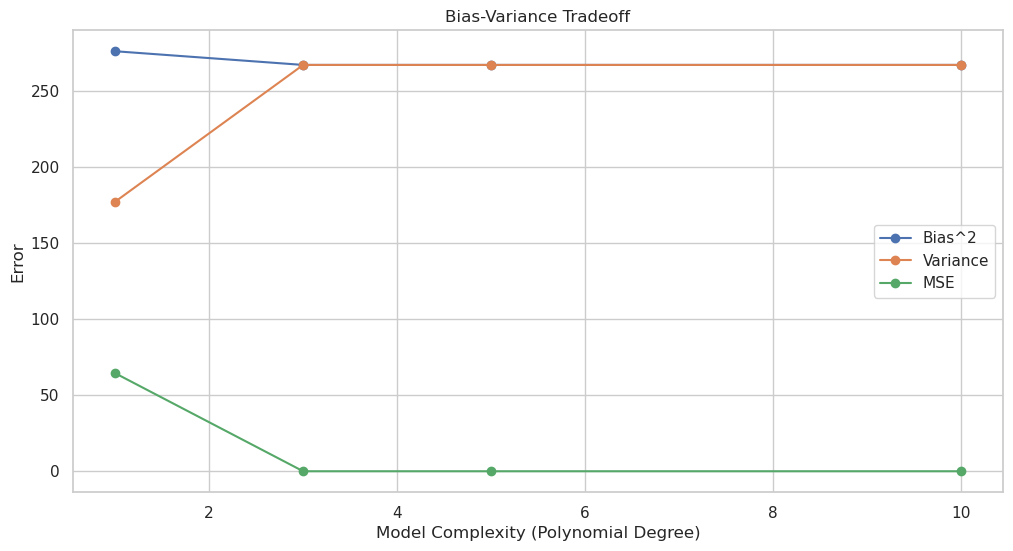

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
n_samples = 100
X = np.random.uniform(-3, 3, size=n_samples).reshape(-1, 1)
y = X**3 - 2*X**2 + X + np.random.normal(0, 3, size=n_samples)  # Cubic function with noise

# Function to calculate bias and variance
def calculate_bias_variance(model, X_train, X_test, y_train, y_test, degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train model
    model.fit(X_train_poly, y_train)
    predictions = model.predict(X_test_poly)
    
    # Calculate bias and variance
    y_pred = np.mean(predictions)
    bias = np.mean((y_test - y_pred)**2)
    variance = np.mean((predictions - y_pred)**2)
    mse = mean_squared_error(y_test, predictions)
    
    return bias, variance, mse

# Evaluate models with different polynomial degrees
degrees = [1, 3, 5, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
biases, variances, mses = [], [], []

for degree in degrees:
    model = LinearRegression()
    bias, variance, mse = calculate_bias_variance(model, X_train, X_test, y_train, y_test, degree)
    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(degrees, biases, label="Bias^2", marker='o')
plt.plot(degrees, variances, label="Variance", marker='o')
plt.plot(degrees, mses, label="MSE", marker='o')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()


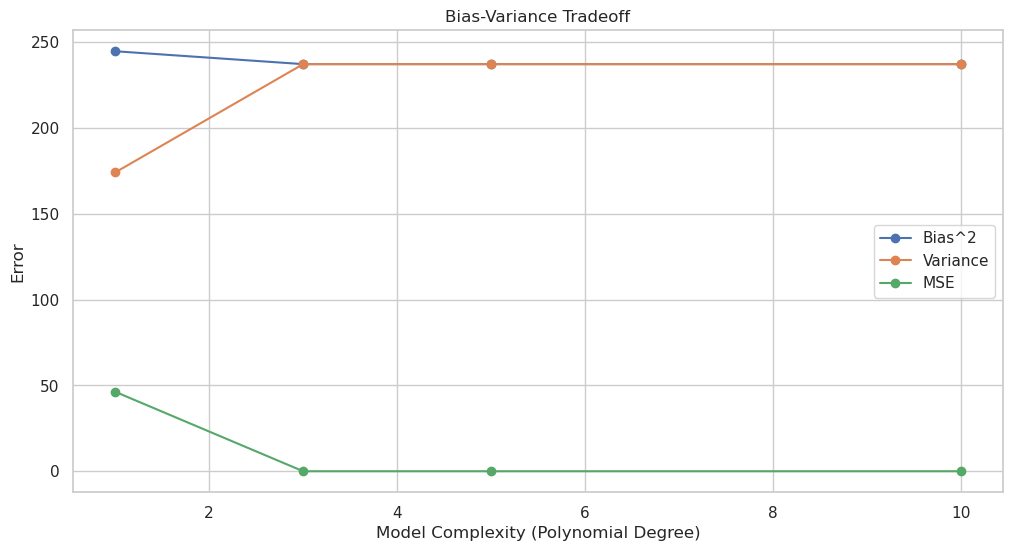

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_samples = 100
X = np.random.uniform(-3, 3, size=n_samples).reshape(-1, 1)
y = X**3 - 2*X**2 + X + np.random.normal(0, 3, size=n_samples)  # Cubic function with noise

# Function to create polynomial features manually
def polynomial_features(X, degree):
    X_poly = X.copy()
    for d in range(2, degree+1):
        X_poly = np.hstack((X_poly, X**d))
    return X_poly

# Train-test split manually
def train_test_split(X, y, test_size=0.3):
    n = len(X)
    indices = np.random.permutation(n)
    test_set_size = int(test_size * n)
    train_indices = indices[test_set_size:]
    test_indices = indices[:test_set_size]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Linear regression using the normal equation
def linear_regression(X_train, y_train):
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    # Normal equation: theta = (X.T * X)^(-1) * X.T * y
    theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    return theta

# Function to calculate bias and variance
def calculate_bias_variance(X_train, X_test, y_train, y_test, degree):
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)
    
    # Train the model using the normal equation
    theta = linear_regression(X_train_poly, y_train)
    
    # Predict on test set
    X_test_poly = np.hstack((np.ones((X_test_poly.shape[0], 1)), X_test_poly))  # Add bias term
    predictions = X_test_poly.dot(theta)
    
    # Calculate bias and variance
    y_pred = np.mean(predictions)
    bias = np.mean((y_test - y_pred)**2)
    variance = np.mean((predictions - y_pred)**2)
    mse = np.mean((y_test - predictions)**2)
    
    return bias, variance, mse

# Evaluate models with different polynomial degrees
degrees = [1, 3, 5, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
biases, variances, mses = [], [], []

for degree in degrees:
    bias, variance, mse = calculate_bias_variance(X_train, X_test, y_train, y_test, degree)
    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(degrees, biases, label="Bias^2", marker='o')
plt.plot(degrees, variances, label="Variance", marker='o')
plt.plot(degrees, mses, label="MSE", marker='o')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()


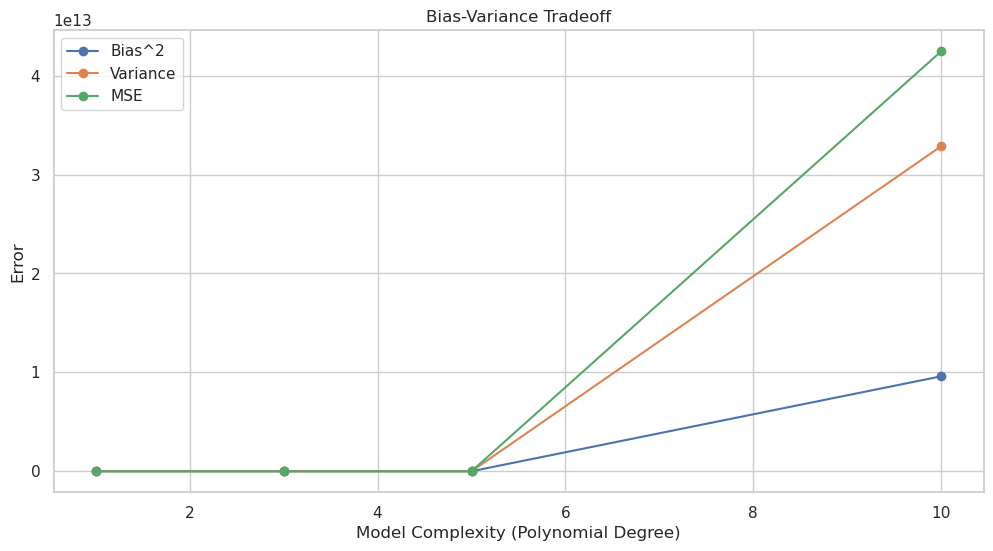

In [10]:
import random
import matplotlib.pyplot as plt

# Generate synthetic data manually
random.seed(42)
n_samples = 100
X = [random.uniform(-3, 3) for _ in range(n_samples)]
y = [x**3 - 2*x**2 + x + random.gauss(0, 3) for x in X]  # Cubic function with noise

# Function to create polynomial features manually
def polynomial_features(X, degree):
    X_poly = [[x**d for d in range(1, degree+1)] for x in X]
    return X_poly

# Train-test split manually
def train_test_split(X, y, test_size=0.3):
    n = len(X)
    indices = list(range(n))
    random.shuffle(indices)
    test_set_size = int(test_size * n)
    train_indices = indices[test_set_size:]
    test_indices = indices[:test_set_size]
    
    X_train = [X[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    y_train = [y[i] for i in train_indices]
    y_test = [y[i] for i in test_indices]
    
    return X_train, X_test, y_train, y_test

# Linear regression using the normal equation
def linear_regression(X_train, y_train):
    # Add bias term (ones column) to X_train
    X_train = [[1] + x for x in X_train]
    
    # Compute (X.T * X)
    X_transpose_X = [[sum(X_train[i][k] * X_train[j][k] for i in range(len(X_train))) for j in range(len(X_train[0]))] for k in range(len(X_train[0]))]
    
    # Compute (X.T * y)
    X_transpose_y = [sum(X_train[i][k] * y_train[i] for i in range(len(X_train))) for k in range(len(X_train[0]))]
    
    # Solve for theta using the normal equation: theta = (X.T * X)^-1 * (X.T * y)
    # We solve it via the Gaussian elimination method for simplicity
    theta = gaussian_elimination(X_transpose_X, X_transpose_y)
    
    return theta

# Gaussian elimination to solve system of linear equations
def gaussian_elimination(A, b):
    n = len(A)
    # Augmented matrix [A | b]
    augmented = [row + [b[i]] for i, row in enumerate(A)]
    
    for i in range(n):
        # Make the diagonal contain all 1s
        for j in range(i + 1, n):
            if augmented[j][i] != 0:
                ratio = augmented[j][i] / augmented[i][i]
                for k in range(i, n + 1):
                    augmented[j][k] -= ratio * augmented[i][k]
    
    # Back substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = augmented[i][n] / augmented[i][i]
        for j in range(i - 1, -1, -1):
            augmented[j][n] -= augmented[j][i] * x[i]
    
    return x

# Function to calculate bias and variance
def calculate_bias_variance(X_train, X_test, y_train, y_test, degree):
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)
    
    # Train the model using the normal equation
    theta = linear_regression(X_train_poly, y_train)
    
    # Predict on test set
    X_test_poly = [[1] + x for x in X_test_poly]  # Add bias term
    predictions = [sum(X_test_poly[i][j] * theta[j] for j in range(len(X_test_poly[0]))) for i in range(len(X_test_poly))]
    
    # Calculate bias and variance
    y_pred = sum(predictions) / len(predictions)
    bias = sum((y_test[i] - y_pred) ** 2 for i in range(len(y_test))) / len(y_test)
    variance = sum((predictions[i] - y_pred) ** 2 for i in range(len(predictions))) / len(predictions)
    mse = sum((y_test[i] - predictions[i]) ** 2 for i in range(len(y_test))) / len(y_test)
    
    return bias, variance, mse

# Evaluate models with different polynomial degrees
degrees = [1, 3, 5, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
biases, variances, mses = [], [], []

for degree in degrees:
    bias, variance, mse = calculate_bias_variance(X_train, X_test, y_train, y_test, degree)
    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(degrees, biases, label="Bias^2", marker='o')
plt.plot(degrees, variances, label="Variance", marker='o')
plt.plot(degrees, mses, label="MSE", marker='o')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()
